<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/POO/blob/main/Unidad3/Cambios_Unidad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Conceptos de herencia**

| Concepto POO                      | Explicación práctica                                                                  |
| --------------------------------- | ------------------------------------------------------------------------------------- |
| **Herencia**                      | `Estudiante` y `Trabajador` heredan atributos de `Persona`                            |
| **Reutilización de código**       | No se repiten los atributos comunes (`nombre`, `correo`, `fecha_nacimiento`)          |
| **Sobreescritura de métodos**     | Cada subclase redefine `mostrar_info()`                                               |
| **Encapsulamiento y jerarquía**   | Permite organizar el código por tipo de persona                                       |
| **Polimorfismo (posteriormente)** | Podrás recorrer una lista de `Persona` sin importar si son estudiantes o trabajadores |


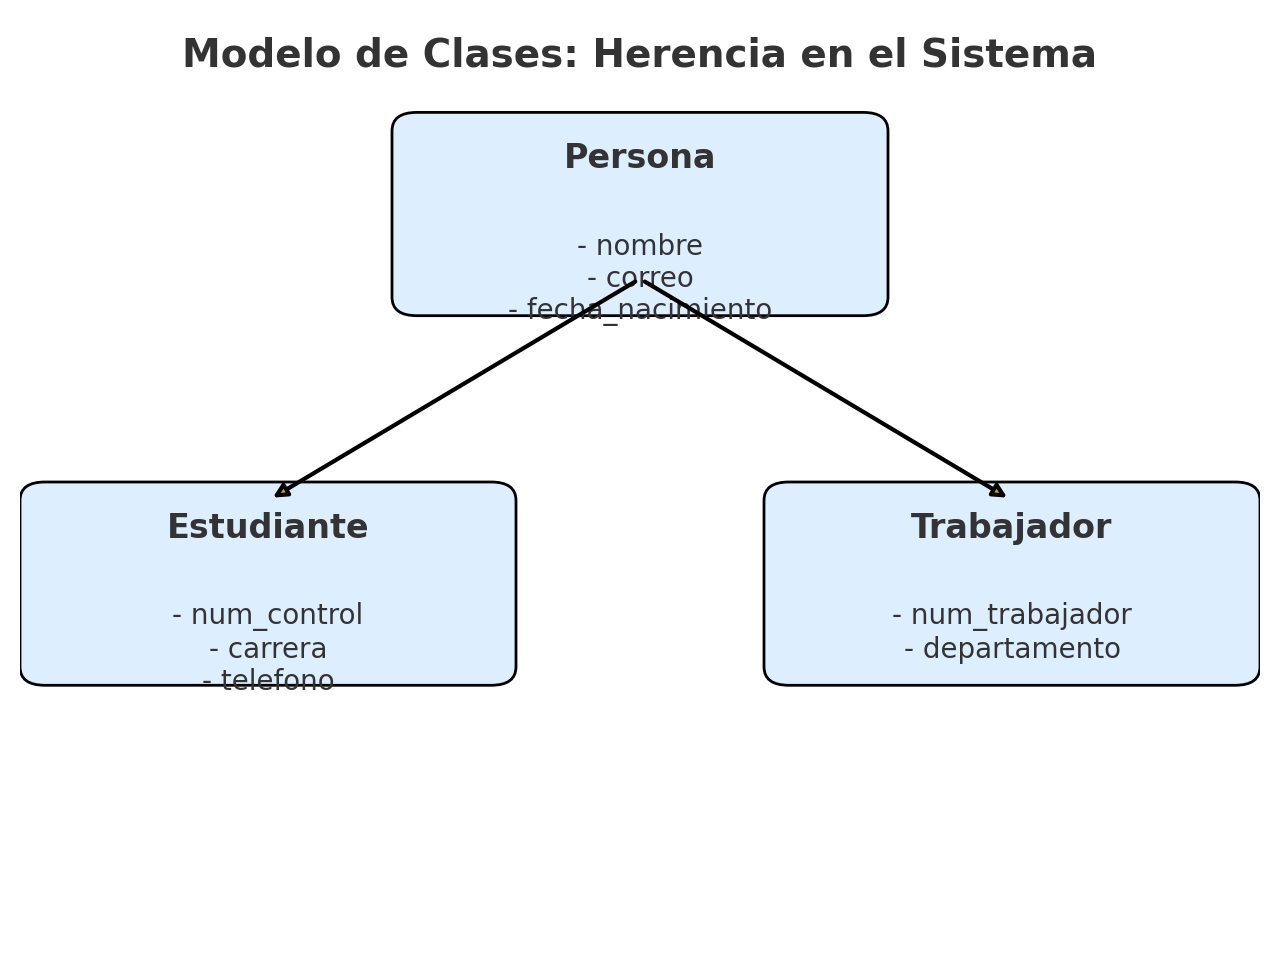

### **Ajustes necesarios**
* Añadir estas clases (Persona, Estudiante, Trabajador) al archivo sistema.py.
* Crear una lista trabajadores en datos.py.
* Implementar una función login_trabajador() en sistema.py que pida número de trabajador y contraseña (puede ser opcional al principio).
* Mostrar en pantalla quién realiza las operaciones.

In [ ]:
# Esta clase define los atributos comunes que comparten tanto los estudiantes como los trabajadores.
class Persona:
    def __init__(self, nombre, correo, fecha_nacimiento):
        self.nombre = nombre
        self.correo = correo
        self.fecha_nacimiento = fecha_nacimiento

    def mostrar_info(self):
        print(f"Nombre: {self.nombre} | Correo: {self.correo} | Fecha de nacimiento: {self.fecha_nacimiento}")


In [ ]:
# subclase estudiantes
# Estudiante hereda de Persona con class Estudiante(Persona):.
# Dentro de su constructor (__init__), llama a super().__init__(...),
# que ejecuta el constructor de la clase padre (Persona).
# Esto hace que nombre, correo y fecha_nacimiento sean atributos de Persona,
# pero accesibles desde cualquier objeto de tipo Estudiante.

class Estudiante(Persona):
    def __init__(self, num_control, nombre, carrera, fecha_nacimiento, telefono, correo):
        super().__init__(nombre, correo, fecha_nacimiento)  # Hereda atributos de Persona
        self.num_control = num_control
        self.carrera = carrera
        self.telefono = telefono

    def mostrar_info(self):
        return (f"[Estudiante] {super().mostrar_info()}, "
                f"Número Control: {self.num_control}, Carrera: {self.carrera}, Teléfono: {self.telefono}")


In [ ]:
#subclase trabajador

class Trabajador(Persona):
    def __init__(self, num_trabajador, nombre, correo, fecha_nacimiento, departamento, usuario, contrasena):
        super().__init__(nombre, correo, fecha_nacimiento)  # Hereda atributos de Persona
        self.num_trabajador = num_trabajador
        self.departamento = departamento
        self.usuario = usuario
        self.contrasena = contrasena

    def mostrar_info(self):
        return (f"[Trabajador] {super().mostrar_info()}, "
                f"Número Trabajador: {self.num_trabajador}, Departamento: {self.departamento}, "
                f"Usuario: {self.usuario}")


In [ ]:
# Alta estudiante queda igual

# FUNCIONAMIENTO DE LA HERENCIA
# 1-. Se crea un nuevo objeto de tipo Estudiante.
# 2-. Al instanciarlo (Estudiante(...)), automáticamente se ejecuta el __init__ de Estudiante.
# 3-. Dentro del __init__ de Estudiante, la llamada a super().__init__
#                   (nombre, correo, fecha_nacimiento) ejecuta el constructor de Persona.
# 4-. Esto asigna los atributos de Persona (self.nombre, self.correo, self.fecha_nacimiento) al nuevo objeto.
# 5-. Por tanto, el enlace es jerárquico.
# 6-. No se llama a Persona() desde alta_estudiante(), sino que la propia subclase
#   Estudiante se encarga de construir también la parte “Persona” al usar super().

def alta_estudiante():
    print("\n===== ALTA DE ESTUDIANTE =====")
    num_control = input("Número de control: ")
    for est in estudiantes:
        if est.num_control == num_control:
            print("¡Ya existe un estudiante con ese número de control!")
            return
    nombre = input("Nombre: ")
    carrera = input("Carrera: ")
    fecha_nacimiento = input("Fecha de nacimiento (YYYY-MM-DD): ")
    telefono = input("Teléfono: ")
    correo = input("Correo: ")

    nuevo = Estudiante(num_control, nombre, carrera, fecha_nacimiento, telefono, correo)
    estudiantes.append(nuevo)
    print(f"Estudiante {nombre} registrado correctamente.\n")


In [ ]:
def alta_trabajador():
    print("\n===== ALTA DE TRABAJADOR =====")
    num_trabajador = input("Número de trabajador: ")
    for t in trabajadores:
        if t.num_trabajador == num_trabajador:
            print("¡Ya existe un trabajador con ese número de trabajador!")
            return
    nombre = input("Nombre: ")
    correo = input("Correo: ")
    fecha_nacimiento = input("Fecha de nacimiento (YYYY-MM-DD): ")
    departamento = input("Departamento: ")
    usuario = input("Usuario de acceso: ")
    contrasena = input("Contraseña: ")

    nuevo = Trabajador(num_trabajador, nombre, correo, fecha_nacimiento, departamento, usuario, contrasena)
    trabajadores.append(nuevo)
    print(f"Trabajador {nombre} agregado correctamente.\n")

In [ ]:
def mostrar_trabajadores():
    print("\n--- Lista de Todos los Trabajadpore ---")
    if not trabajadores:
        print("No hay trabajadores registrados.")
    else:
        for trabajador in trabajadores:
            trabajador.mostrar_info()

In [ ]:
def iniciar_sesion():
    print("\n===== INICIO DE SESIÓN =====")
    usuario = input("Usuario: ")
    contrasena = input("Contraseña: ")

    for t in trabajadores:
        if t.usuario == usuario and t.contrasena == contrasena:
            print(f"\nBienvenido, {t.nombre} ({t.departamento})")
            return t
    print("Usuario o contraseña incorrectos.\n")
    return None

In [ ]:
def mostrar_menu():
    print("\n--- SISTEMA DE LIBRERÍA ESCOLAR (con inventario) ---")
    print("1. Dar de alta libro")
    print("2. Dar de alta estudiante")
    print("3. Consultar libro por ISBN")
    print("4. Consultar estudiante por número de control")
    print("5. Mostrar inventario")
    print("6. Mostrar todos los estudiantes")
    print("7. Realizar préstamo")
    print("8. Mostrar préstamos")
    print("9. Devolver libro")
    print("10. Registrar ventas")
    print("11. Mostrar historial de ventas")
    print("12. Dar de alta trabajador")
    print("13. Listar todos los trabajadores")
    print("14. Salir del sistema")


def iniciar_sistema():
    sesion = iniciar_sesion()
    while sesion:
        mostrar_menu()
        opcion = input("Seleccione una opción: ")
        if opcion == "1":
            alta_libro()
        elif opcion == "2":
            alta_estudiante()
        elif opcion == "3":
            consultar_libro()
        elif opcion == "4":
            consultar_estudiante()
        elif opcion == "5":
            mostrar_inventario()
        elif opcion == "6":
            mostrar_todos_estudiantes()
        elif opcion == "7":
            realizar_prestamo()
        elif opcion == "8":
            mostrar_prestamos()
        elif opcion == "9":
            devolver_libro()
        elif opcion == "10":
            registrar_venta()
        elif opcion == "11":
            mostrar_historial_ventas()
        elif opcion == "12":
            alta_trabajador()
        elif opcion == "13":
            mostrar_trabajadores()
        elif opcion == "14":
            print("Saliendo del sistema.")
            break
        else:
            print("Opción no válida.")

In [ ]:
############# Programa Principal

inventarios = []
estudiantes = []
prestamos = []
ventas = []
trabajadores = []  # Lista para almacenar trabajadores

# Usuario por defecto (admin)
admin = Trabajador("0001", "Administrador del Sistema", "admin@gmail.com", \
                   "1980-01-01", "Sistemas", "admin", "admin")
trabajadores.append(admin)

iniciar_sistema()

## **Redefinición de métodos en clases derivadas**

* Redefinir (o sobrescribir) un método en una clase derivada significa volver a declarar un método que ya existe en la clase base, cambiando su comportamiento.
* En otras palabras, La subclase hereda el método, pero decide modificarlo o mejorarlo.
* Por ejemplo, en la clase base Persona tenemos este método.
* Si no se redefine, tanto Estudiante como Trabajador heredan este mismo comportamiento.
* Pero si queremos que cada tipo de persona muestre información de manera diferente, podemos redefinir el método en las subclases.

In [ ]:
class Estudiante(Persona):
    def mostrar_info(self):
        # Redefinimos el método para incluir datos de estudiante
        return (f"[Estudiante] Nombre: {self.nombre}, "
                f"Carrera: {self.carrera}, "
                f"Número de control: {self.num_control}")

class Trabajador(Persona):
    def mostrar_info(self):
        # Redefinimos el método para incluir datos del trabajador
        return (f"[Trabajador] Nombre: {self.nombre}, "
                f"Departamento: {self.departamento}, "
                f"Número de trabajador: {self.num_trabajador}")


In [ ]:
e = Estudiante("223344", "Ana Pérez", "Sistemas", "2002-05-10", "5551234", "ana@gmail.com")
t = Trabajador("0001", "Juan López", "juan@gmail.com", "1985-04-15", "Sistemas", "jlopez", "1234")

print(e.mostrar_info())
print(t.mostrar_info())


A veces no quieres reemplazar totalmente el método heredado, sino extenderlo.

Para eso, puedes usar **super().**

como ya se hizo en el ejemplo del sistema de librería


In [ ]:
class Estudiante(Persona):
    def mostrar_info(self):
        base_info = super().mostrar_info()  # Llama al método de Persona
        return f"[Estudiante] {base_info}, Carrera: {self.carrera}, Núm. Control: {self.num_control}"
